# Razvejanost kraljestva živali


<img src="zivali.jpg"></img> 

Na predavanjih smo spoznali algoritem <b>hieraričnega gručenja</b>. Njegova glavna značilnost je, da omogoča primerjavo objektov zgolj na podlagi poznavanja <i> mere razdalje </i> med njimi. Predstavitev podatkov torej ni nujno omejena na vektorske prostore.

Algoritem je determinističen in ne predpostavlja števila gruč. Rezultat gručenja bo izračunan naenkrat za vsa možna števila gruč v intervalu $[1, n]$, odločitev o številu pa bo sprejeta po izračunu.



<font color="blue"><b>Razmisli.</b></font> Kakšna je časovna zahtevnost algoritma za hierarhično gručenje? Kako se primerja z metodo K-means?

In [ ]:
import numpy as np

% matplotlib inline
import matplotlib.pyplot as plt
import Orange
import scipy.cluster.hierarchy as sch
import scipy

Današnji podatki spominjajo na (starejši generaciji dobro znani) album sličic z živalmi. Vsebuje 59 živalskih vrst ter 16 atributov, ki opisuje pripadajoče anatomske značilnosti. Živali so razdeljene v 7 razredov.

In [2]:
data = Orange.data.Table("zoo.tab")
print(data.domain)
print(data[:10])

[hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize | type] {name}
[[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1 | mammal] {aardvark},
 [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1 | mammal] {antelope},
 [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0 | fish] {bass},
 [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1 | mammal] {boar},
 [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 1, 1 | mammal] {calf},
 [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0 | fish] {carp},
 [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 0, 1, 0 | mammal] {cavy},
 [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0 | bird] {chicken},
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0 | invertebrate] {clam},
 [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0 | invertebrate] {crab}


Zanimala nas bo predvsem matrika `X`, ki podatke hrani v številski obliki.

In [3]:
X = data.X
print(X.shape)

(59, 16)


Rezultat gručenja dobimo z uporabo modula `scipy.cluster.hierarchy` in metode `linkage`. Slednja izračune povezave v drevesu (dendrogramu) glede na dano mero razdalje (`metric`) in načinom merjenja razdalj med gručami (`method`).

In [4]:
L = sch.linkage(X, method="ward", metric="euclidean")

Z uporabo funkcije `dendrogram` narišemo drevo in mu priredimo oznake. Funkcija deluje v navezi z že znano knjižnico `matplotlib`.

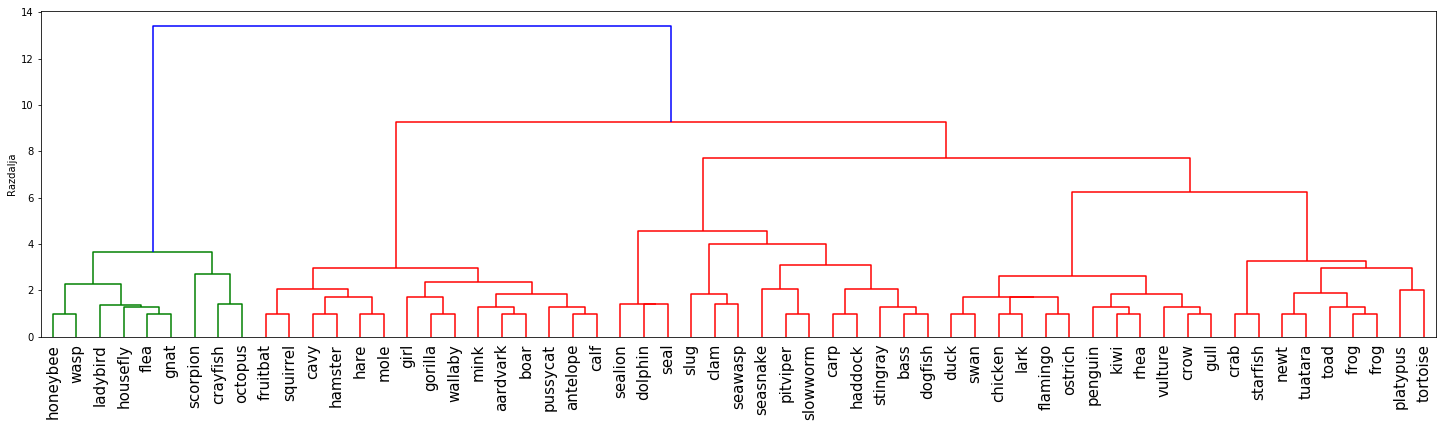

In [5]:
plt.figure(figsize=(25, 6))
labels = [row["name"].value for row in data]
D      = sch.dendrogram(L, labels=labels, p=20, leaf_font_size=15)
plt.ylabel("Razdalja")
plt.show()

V redu, za prvi poizkus. Vseeno izgleda dendrogram nekoliko sploščen. Preveri, kako na graf vplivajo različne ...

### ... metode povezovanja

Metode povezovanja določajo način, kako izračunati razdaljo med dvema poljubno velikima gručama točk.
* <b>Posamično povezovanje</b> (method="single"); Razdalja med gručama je razdalja med najbližjima točkama gruč.
* <b>Povprečna razdalja</b> (method="average"); Povprečna razdalja med vsemi pari točk. 
* <b>Razdalja med središčema</b> (method="centroid"); Izračuna središči gruč v prostoru ter njuno medsebojno razdaljo. Mera razdalje je nujno evklidska.

<font color="green"><b>Naredi sam/a.</b></font> Preizkusi različne oblike dendrograma glede na izbrano mero razdalje.

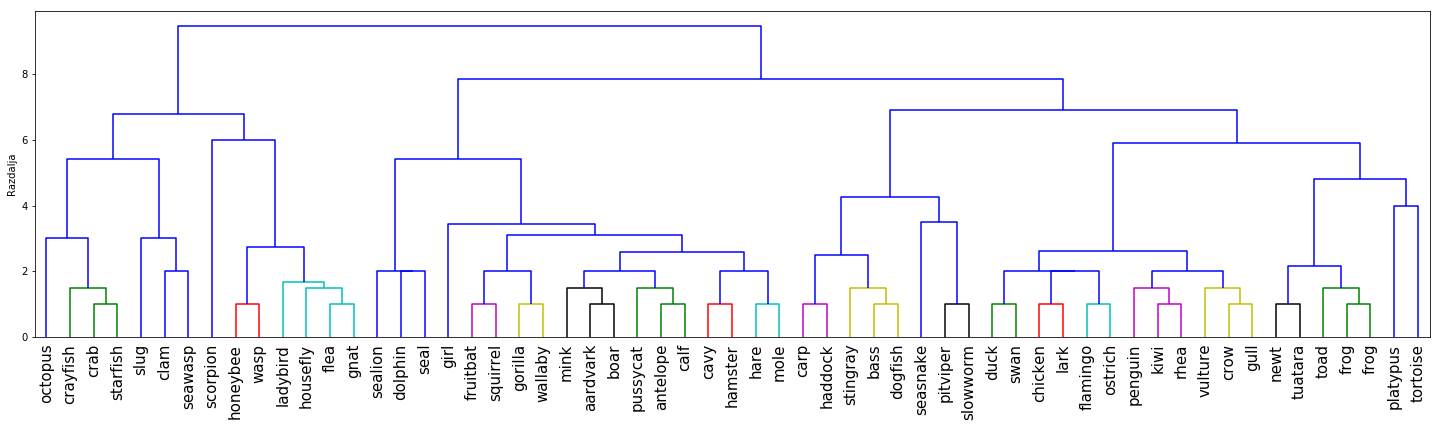

In [6]:
# Preizkusi različne načine merjenja razdalje med gručami
L = sch.linkage(X, method="average", metric="cityblock")

plt.figure(figsize=(25, 6))
labels = [row["name"].value for row in data]
D      = sch.dendrogram(L, labels=labels, p=20, leaf_font_size=15, color_threshold=2)
plt.ylabel("Razdalja")
plt.show()

Ali je evklidska razdalja res najbolj primeren način primerjanja atributov, ki so diskretni? Ne vedno.

### Mere razdalje

Način določanja interpretacije razdalje med točkama $\vec{x} = (x_1, x_2, ..., x_p)$ in $\vec{y} = (y_1, y_2, ..., y_p)$ vpliva na rezultat hierarhičnega gručenja. Izbira ustrezne mere je odvisna od narave podatkov in čimbolje odgovarja na vprašanje: <i>kaj pomeni, da sta dva primera podobna?</i>

Na izbiro ustrezne mere lahko vplivajo:
* Prisotnost manjkajočih vrednosti
* Predstavitev podatkov (vektorji, nizi znakov, slike, ...)
* Tip atributov in interpretacija vrednosti


Nekaj pogostih mer razdalje:
* Evklidska razdalja <code>(metric="euclidean")</code>

$$ d(\vec{x}, \vec{y}) = \sqrt{(x_1-y_1)^2 + (x_2 - y_2)^2 + ... + (x_p - y_p)^2} $$

* Manhattanska razdalja <code>(metric="cityblock")</code>

$$ d(\vec{x}, \vec{y}) = |x_1-y_1| + |x_2 - y_2| + ... + |x_p - y_p| $$

* Kosinusna razdalja <code>(metric="cosine")</code>

<p>Predstavlja <i>kosinus kota</i> med vektorjema $\vec{x}$ in $\vec{y}$ - manjši kot pomeni večjo podobnost. Uporabna za primerjavo podobnosti med vektorji, neupoštevajoč absolutnih velikosti.</p>

$$ d(\vec{x}, \vec{y}) = 1 - \frac{\vec{x} \cdot \vec{y}}{\|\vec{x}\| \|\vec{y}\|} $$

* Jaccardov index <code>(metric="jaccard")</code>

<p>Izmeri delež ujemanj med pari soležnih komponent $(x_i, y_i)$, kjer je vsaj ena izmed vrednosti $x_i$ ali $y_i$ večja od nič. Primerna za uporabo v primerih, ko imamo opravka z manjkajočimi vrednostmi ali diskretnimi atributi.</p>

Popoln spisek razdalj najdeš v <a href="http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.spatial.distance.pdist.html">dokumentaciji</a>.

<br/>
<font color="blue"><b>Razmisli.</b></font> Poizkusi se spomniti vrste podatkov, kjer bi bilo smiselno uporabiti vsako posamezno mero.

### Določanje števila gruč

Koliko gruč je v podatkih? Na to vprašanje je težko odgovoriti in tudi sicer velja za odprto vprašanje na področju storjnega učenja. Vseeno poznamo nekaj kazalcev, ki jih v grobem delimo na 
* <font color="green">nadzorovane</font> (znani so resnični razredi podatkov)
* <font color="blue">nenadzorovane</font> (znane so samo značilke in/ali razdalje med primeri)

Za določitev pripadnosti primerov gručam uporabimo funkcijo `fcluster`. Slednja prejme parameter `t`, ki določa razdaljo pri kateri <i>odsekamo</i> dendrogram, t.j. odstranimo vse povezave, ki so daljše od dane dolžine. Preostale povezane komponente grafa dendrograma tako tvorijo skupine.

In [7]:
t = 4.0
L = sch.linkage(X, method="average", metric="cityblock")
predictions = sch.fcluster(L, t=t, criterion="distance").ravel()
classes     = data.Y.ravel()   # resnicni razredi 

print("Primer", "Resnični razred", "Gruča")
for row,prediction, category in list(zip(data, predictions, classes ))[2:10]:
        print("%s\t%d\t%d" % (row["name"], category, prediction))

Primer Resnični razred Gruča
bass	2	7
boar	5	6
calf	5	6
carp	2	7
cavy	5	6
chicken	1	9
clam	4	2
crab	4	1


Ponovno narišemo dendrogram in ga <i>odsekamo</i> pri dani razdalji. V nadaljevanju si bomo ogledali številske ocene uspešnosti gručenja.

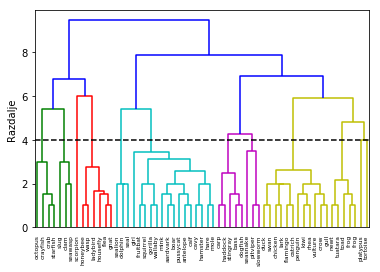

In [8]:
D = sch.dendrogram(L, labels=labels)
plt.plot([0, 1000], [t, t], "k--")
plt.ylabel("Razdalje")
plt.show()

#### <font color="green">Skupna deljena informacija</font>

Mera skupne deljene informacije je uporabna, ko so na voljo informacije o resničnih razredih, v katere spadajo primeri. Pri tem ni odveč poudariti, da resnični razredi ne smejo biti uporabljeni pri deljenju primerov v skupine.

Naključne dodelitve oznak gruč imajo vrednost skupne deljene informacije 
blizu `0.0` za vsako vrednost števila skupin in števila primerov. Popolno ujemanje gruč z obstoječimi razredi ima vrednost `1`.
Mera ni odvisna od predstavitve podatkov, t.j. ni potrebno da so podatki v vektorskem prostoru, saj je odvisna samo od oznak.

In [15]:
from sklearn.metrics import adjusted_mutual_info_score
score = adjusted_mutual_info_score(classes, predictions)
score

0.56272351118685748

#### <font color="blue">Koeficitent silhuete</font>

Koeficient silhuete je nenadzorovana meta v območju med `-1` (napačno dodeljene skupine) in `1` (zelo goste, dobro ločene skupine). Večja notranja gostota znotraj skupin in večja razdalja sta premosorazmeni s koeficientom. Tudi ta mera ne predpostavlja, da so podatki v vektorskem prostoru, je pa odvisna od izbrane mere razdalje.

<font color="green"><b>Naredi sam/a.</b></font> Preveri, kako se ocena spreminja glede na izbrano mero razdalje. Katera mera razdalje najbolje oceni gručenje? Ali je rezultat smiseln?

In [10]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, predictions, metric="euclidean")
score

0.30009292688587408

<font color="green"><b>Naredi sam/a.</b></font> Izvedi analizo gručenja na podatkih o živalih  tako, da izbereš ustrezno metodo povezovanja, mero razdalje in število gruč. Uporabi eno od predstavljenih mer podobnosti ter poišči tako kombinacijo omenjenih nastavitev, da bo rezultat gručenja karseda visok.

In [19]:
from sklearn.metrics import *
metrics = ["cityblock"]#"euclidean",  "cosine"
methods = ["average", "single", "complete"]

bestScore = -20
bestT = 0
bestMetrics = ""
bestMethods = ""

arr = []

for meth in methods:
    for metr in metrics:

        L = sch.linkage(X, method=meth, metric=metr)
        for t in range(1,5):

            predictions = sch.fcluster(L, t=t, criterion="distance").ravel()
            classes     = data.Y.ravel()   # resnicni razredi 

            score = silhouette_score(X, predictions, metric=metr)
            
            bestScore = score
            arr.append([score, t, meth, metr])

            
                
arr.sort(reverse=True)
print(arr)

print("\n")

neki =silhouette_samples(X,predictions, metric="cityblock") #### KONČN TODO
print(neki)

[[0.48926283587618491, 4, 'average', 'cityblock'], [0.45723255802688834, 2, 'single', 'cityblock'], [0.37766036633828748, 4, 'complete', 'cityblock'], [0.37058152517422077, 3, 'average', 'cityblock'], [0.33678571898910881, 2, 'complete', 'cityblock'], [0.33252225000452124, 3, 'complete', 'cityblock'], [0.31577946474414958, 2, 'average', 'cityblock'], [0.30219444106178639, 1, 'single', 'cityblock'], [0.207909604519774, 1, 'complete', 'cityblock'], [0.207909604519774, 1, 'average', 'cityblock'], [0.20016344511246928, 4, 'single', 'cityblock'], [0.20016344511246928, 3, 'single', 'cityblock']]


[ 0.08163265  0.32653061  0.55        0.51785714  0.14285714  0.53125
  0.14666667  0.34        0.57894737  0.36363636  0.64285714  0.26153846
  0.59615385  0.54545455  0.325       0.4         0.43529412  0.73684211
  0.57142857  0.2         0.25925926  0.6952381   0.5         0.2
  0.59615385  0.15789474 -0.3         0.6         0.744       0.43529412
  0.43529412  0.4         0.35714286  0.257142

## Podatki v obliki nizov znakov

Stopnja razvoja na področju biotehnologije omogoča pridobivanje bistveno več podatkov o organizmih. Eden pogostih podatkovnih tipov, s katerimi primerjamo vrste so genske zapisi. Ti so pripravni za predstavitev v računalništvu, saj jih lahko posplošimo na zaporedna štirih nukleotidov: A, C, G, T. Celoten genski zapis ki določa vse, od vaše barve oči do nagnjenosti do določenih bolezni je podano z nekaj več kot $3 \times 10^{12}$ dolgim zaporednjem DNK.

Pri razmoževanju prihaja do prepisovanja in kombiniranja DNA zapisov staršev. Ta proces seveda ni popoln, zato prihaja do napak - <i>mutacij</i>. Dolgoročna posledica mutacij pa je natanek različnih živalskih vrst, kar pomeni, da imajo sorodnejše vrste bolj podobne genske zapise.

Iz baze genskih zapisov smo naložili zaporednja mitohondrijskega gena za 13 vrst: `'Gorilla gorilla', 'Homo sapiens', 'Carassius auratus auratus', 'Delphinus capensis', 'Chamaeleo calyptratus', 'Canis lupus familiaris', 'Homo sapiens neanderthalensis', 'Rattus norvegicus', 'Equus caballus', 'Daboia russellii', 'Pan troglodytes', 'Takifugu rubripes', 'Pongo abelii', 'Sus scrofa'`.

In [ ]:
import json
sequences = json.load(open("seqs.json"))
print(sequences["Homo sapiens"][:100]) 
print(sequences["Gorilla gorilla"][:100]) 
print(len(sequences["Homo sapiens"]))

<font color="green"><b>Naredi sam/a.</b></font> Kako bi lahko primerjali živalske vrste glede na zapise, ki so podani kot nizi znakov? Prva ideja je, da podatke pretvorimo v vektorski prostor, v katerem bomo računali razdalje. Namig: zaporedja lahko razbiješ na manjše dele in prešteješ število pojavitev posameznih znakov, parov, trojk, ... k-terk. ahko upoštevaš tudi položaj v zaporedju. 

Dopolni in si pomagaj s funkcijo `seq_to_kmer_count`, ki pretvori niz znako v vektor števila pojavitev vseh mogožnih k-terk.

Prevedi podatke v ustrezno obliko, izvedi hierarhično gručenje in prikaži rezultate. Ali so vrste na dendrogramu postavljene smiselno? 

In [ ]:
from itertools import product
def seq_to_kmer_count(seq, k=4):
    """
    Pretvori zaporedje seq v vektor x.
         AAAA AAAC AAAG AAAT ... TTTG TTTT
    x = [   1  1      2   10 ...   12    7]
    """
    
    ktuples = list(zip(*[seq[i:] for i in range(k)]))     # razbijemo trenutni niz seq na k-terke
    kmers   = list(product(*(k*[["A", "C", "T", "G"]])))  # vse mozne k-terke
    
    x = np.zeros((len(kmers), ))
    ### Your code here ### 
    
    return x